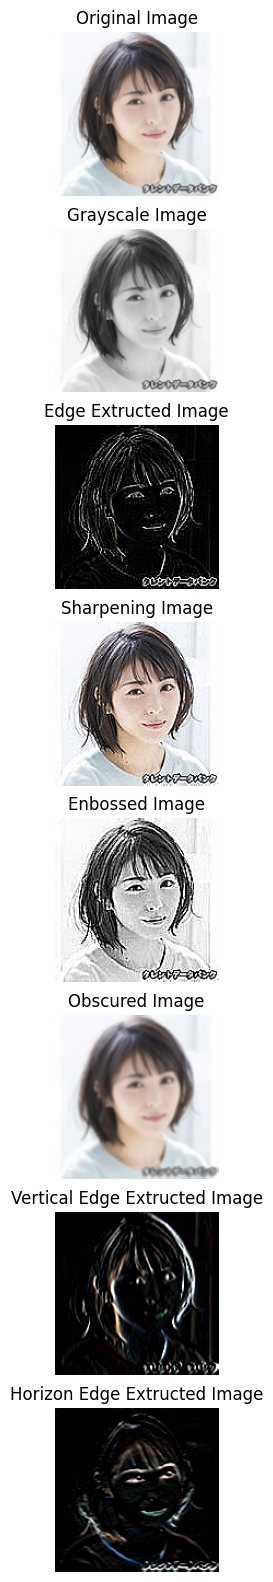

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

directory = "./data/"  # 画像ディレクトリ
input_filename = "MinamiHamabe.jpg"

def to_grayscale(img):
    img = img.convert("RGBA")  # 画像をRGBAモードに変換
    width, height = img.size
    gray_img = Image.new("RGBA", (width, height))  # RGB画像を作成

    for y in range(height):
        for x in range(width):
            r, g, b, a = img.getpixel((x, y))
            gray_value = int(0.2126*r + 0.7152*g + 0.0722*b) # 明るさの計算
            gray_value = int((r + g + b) / 3)

            gray_img.putpixel((x, y), (gray_value, gray_value, gray_value, a))

    return gray_img

def filtering(gray_img, kernel):
    width, height = gray_img.size
    filtered_img = Image.new("RGBA", (width, height))

    # 辺以外の部分について畳み込みフィルタリング
    # この部分を実装
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            # 畳み込み演算を実施
            pixel_sum = np.zeros(3)
            for ky in range(3):
                for kx in range(3):
                    px, py = x + kx - 1, y + ky - 1
                    weight = kernel[ky][kx]
                    pixel = gray_img.getpixel((px, py))
                    pixel_sum += np.array(pixel[:3]) * weight
            pixel_sum = np.clip(pixel_sum, 0, 255)  # ピクセル値を0-255の範囲内にクリップ
            filtered_img.putpixel((x, y), tuple(map(int, pixel_sum.tolist())))


    # 画像の辺について、その上下左右のピクセル値をコピー
    for x in range(width):
        filtered_img.putpixel((x, 0), filtered_img.getpixel((x, 1)))
        filtered_img.putpixel((x, height - 1), filtered_img.getpixel((x, height - 2)))
    for y in range(height):
        filtered_img.putpixel((0, y), filtered_img.getpixel((1, y)))
        filtered_img.putpixel((width - 1, y), filtered_img.getpixel((width - 2, y)))

    return filtered_img

# 図のサイズを指定
fig = plt.figure(figsize=(10, 20))

# 画像を読み込む
img = Image.open(os.path.join(directory, input_filename))

# グレースケール画像に変換する
gray_img = to_grayscale(img)

# 畳み込みフィルタリングを実施する
kernel0 = np.array([  # エッジ抽出フィルタマスク
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

# 畳み込みフィルタリングを実施する
kernel1 = np.array([  # 鮮鋭化フィルタマスク
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# 畳み込みフィルタリングを実施する
kernel2 = np.array([  # エンボスフィルタマスク
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

# 畳み込みフィルタリングを実施する
kernel3 = np.array([  # ぼかしフィルタマスク
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

# 畳み込みフィルタリングを実施する
kernel4 = np.array([  # 縦エッジ抽出フィルタマスク
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

# 畳み込みフィルタリングを実施する
kernel5 = np.array([  # 横エッジ抽出フィルタマスク
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

filtered_img0 = filtering(img, kernel0)
filtered_img1 = filtering(img, kernel1)
filtered_img2 = filtering(gray_img, kernel2)
filtered_img3 = filtering(img, kernel3)
filtered_img4 = filtering(img, kernel4)
filtered_img5 = filtering(img, kernel5)

# 結果を表示する
n = 8
plt.subplot(n, 1, 1)
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")

plt.subplot(n, 1, 2)
plt.imshow(gray_img)
plt.axis("off")
plt.title("Grayscale Image")

plt.subplot(n, 1, 3)
plt.imshow(filtered_img0)
plt.axis("off")
plt.title("Edge Extructed Image")

plt.subplot(n, 1, 4)
plt.imshow(filtered_img1)
plt.axis("off")
plt.title("Sharpening Image")

plt.subplot(n, 1, 5)
plt.imshow(filtered_img2)
plt.axis("off")
plt.title("Enbossed Image")

plt.subplot(n, 1, 6)
plt.imshow(filtered_img3)
plt.axis("off")
plt.title("Obscured Image")

plt.subplot(n, 1, 7)
plt.imshow(filtered_img4)
plt.axis("off")
plt.title("Vertical Edge Extructed Image")

plt.subplot(n, 1, 8)
plt.imshow(filtered_img5)
plt.axis("off")
plt.title("Horizon Edge Extructed Image")

plt.show()